In [38]:
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import numpy as np
import html5lib
import requests
from openpyxl import Workbook
from datetime import datetime
import webbrowser
import os

In [39]:
path = '../process_tables_GBDC_Investment.xlsx'
xls = pd.ExcelFile(path)
all_sheets = pd.read_excel(path, keep_default_na=False, na_values=[
                           '_'], sheet_name=None)

In [40]:
dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df
    print(f"DataFrame name: {sheet_name} : {sheet_df.shape}")

DataFrame name: September_30_2023 : (615, 9)
DataFrame name: June_30_2023 : (649, 9)
DataFrame name: March_31_2023 : (601, 9)
DataFrame name: December_31_2022 : (532, 9)
DataFrame name: September_30_2022 : (569, 9)
DataFrame name: June_30_2022 : (577, 9)
DataFrame name: March_31_2022 : (572, 9)
DataFrame name: December_31_2021 : (576, 9)
DataFrame name: September_30_2021 : (623, 9)
DataFrame name: June_30_2021 : (673, 9)
DataFrame name: March_31_2021 : (649, 9)
DataFrame name: December_31_2020 : (667, 9)
DataFrame name: September_30_2020 : (698, 9)
DataFrame name: June_30_2020 : (714, 9)
DataFrame name: March_31_2020 : (774, 9)
DataFrame name: December_31_2019 : (688, 9)
DataFrame name: September_30_2019 : (503, 9)
DataFrame name: June_30_2019 : (449, 9)
DataFrame name: March_31_2019 : (379, 9)
DataFrame name: December_31_2018 : (334, 9)
DataFrame name: September_30_2018 : (299, 9)
DataFrame name: June_30_2018 : (277, 9)
DataFrame name: March_31_2018 : (282, 9)
DataFrame name: December

In [41]:
for dataframe in dataframes:
    # print(dataframe, ':',
    #       dataframes[dataframe].loc[dataframes[dataframe].shape[0]-1][0])
    if dataframes[dataframe].shape[0]-1 < 250:
        print(
            dataframe, ':', dataframes[dataframe].shape[0]-1)

June_30_2017 : 231
March_31_2017 : 179
December_31_2016 : 213
September_30_2016 : 211
June_30_2016 : 203
March_31_2016 : 210
December_31_2015 : 197
September_30_2015 : 138
June_30_2015 : 141
March_31_2015 : 205
December_31_2014 : 143
September_30_2014 : 159
June_30_2014 : 162
March_31_2014 : 150
December_31_2013 : 160
September_30_2013 : 155
March_31_2013 : 134
June_30_2013 : 148


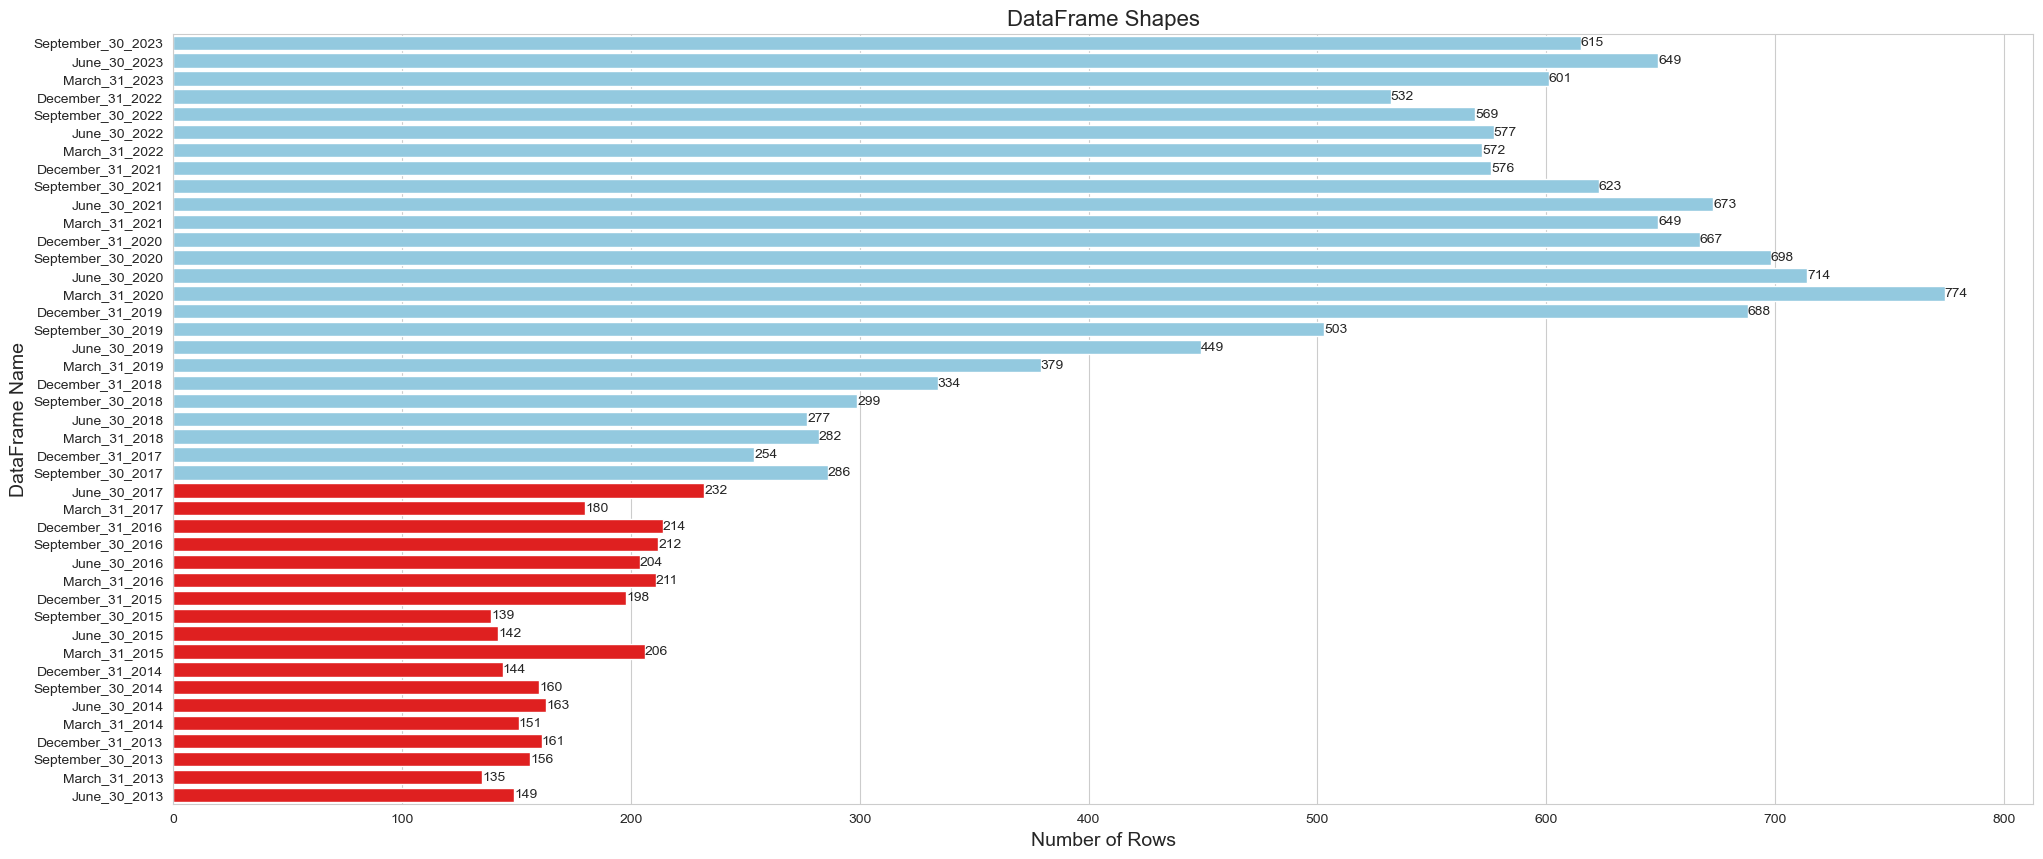

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df

# Extract DataFrame names and shapes
df_names = []
df_shapes = []
for sheet_name, sheet_df in dataframes.items():
    df_names.append(sheet_name)
    df_shapes.append(sheet_df.shape)

# Create a bar graph with Seaborn
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")

# Create a Seaborn barplot
sns.barplot(x=[shape[0] for shape in df_shapes], y=df_names, palette=[
    'red' if shape[0] < 250 else 'skyblue' for shape in df_shapes])

# Customize the appearance of bars
for i, shape in enumerate(df_shapes):
    width = shape[0]
    plt.text(width, i, f'{int(width)}', ha='left', va='center')

# Adjust font size
plt.xlabel('Number of Rows', fontsize=14)
plt.ylabel('DataFrame Name', fontsize=14)
plt.title('DataFrame Shapes', fontsize=16)

plt.show()

In [43]:
def process_table_fun(soi_table_df, process_tables_shapes):
    print(1, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace(r'^\s*\$\s*$', np.nan, regex=True)
    print(2, 'shape:', soi_table_df.shape)
    # fewer non-null values, effectively dropping rows with more than 100 non-null values.
    for index, row in soi_table_df.iterrows():
        if row.count() > 100:
            soi_table_df = soi_table_df.drop(index)
    print(0, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=1)
    print(3, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=0)
    print(4, 'shape:', soi_table_df.shape)
    soi_table_df.dropna()
    print(5, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.rename(
        columns=soi_table_df.iloc[0]).drop(soi_table_df.index[0])
    print(6, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace('—', 0, regex=False)
    print(7, 'shape:', soi_table_df.shape)
    process_tables_shapes.append(soi_table_df.shape)
    return soi_table_df


# df = dataframes['June_30_2021']
# process_table = process_table_fun(df)
# process_table.to_csv("process_table.csv")
# process_table

In [44]:
# for _ in range(len(process_table.columns)):
#     print(process_table.iloc[:, _].unique())

In [45]:
process_tables = {}
process_tables_shape = []
for dataframe in dataframes:
    print(dataframe)
    process_tables[dataframe] = process_table_fun(
        dataframes[dataframe], process_tables_shape)
    print('\n')

September_30_2023
1 shape: (615, 9)
2 shape: (615, 9)
0 shape: (615, 9)
3 shape: (615, 9)
4 shape: (615, 9)
5 shape: (615, 9)
6 shape: (614, 9)
7 shape: (614, 9)


June_30_2023
1 shape: (649, 9)
2 shape: (649, 9)
0 shape: (649, 9)
3 shape: (649, 9)
4 shape: (649, 9)
5 shape: (649, 9)
6 shape: (648, 9)
7 shape: (648, 9)


March_31_2023
1 shape: (601, 9)
2 shape: (601, 9)
0 shape: (601, 9)
3 shape: (601, 9)
4 shape: (601, 9)
5 shape: (601, 9)
6 shape: (600, 9)
7 shape: (600, 9)


December_31_2022
1 shape: (532, 9)
2 shape: (532, 9)
0 shape: (532, 9)
3 shape: (532, 9)
4 shape: (532, 9)
5 shape: (532, 9)
6 shape: (531, 9)
7 shape: (531, 9)


September_30_2022
1 shape: (569, 9)
2 shape: (569, 9)
0 shape: (569, 9)
3 shape: (569, 9)
4 shape: (569, 9)
5 shape: (569, 9)
6 shape: (568, 9)
7 shape: (568, 9)


June_30_2022
1 shape: (577, 9)
2 shape: (577, 9)
0 shape: (577, 9)
3 shape: (577, 9)
4 shape: (577, 9)
5 shape: (577, 9)
6 shape: (576, 9)
7 shape: (576, 9)


March_31_2022
1 shape: (572, 9)

In [46]:
df = (process_tables['September_30_2015'])
df = dataframes['September_30_2015']
df.to_csv('test.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   INVESTMENTS IN NON-CONTROLLED/NON-AFFILIATED INVESTMENTS0120.3(10)  139 non-null    object
 1   Interest Rate (20)                                                  139 non-null    object
 2   Maturity Date                                                       139 non-null    object
 3   Industry (9)                                                        139 non-null    object
 4   Par Amount(12)                                                      139 non-null    object
 5   Cost                                                                139 non-null    object
 6   Fair  Value (1)                                                     139 non-null    object
 7   Unnamed: 7                 

In [48]:
# for _ in range(len(df.columns)):
#     print('')
#     print(df.iloc[:, _].unique())

In [49]:
x = [1, 2, 2, 34, 23, 23, 4, 45, 24, 3, 34, 3]
y = [2, 2, 3, 34, 21, 44, 5, 65, 34, 3, 23, 4]

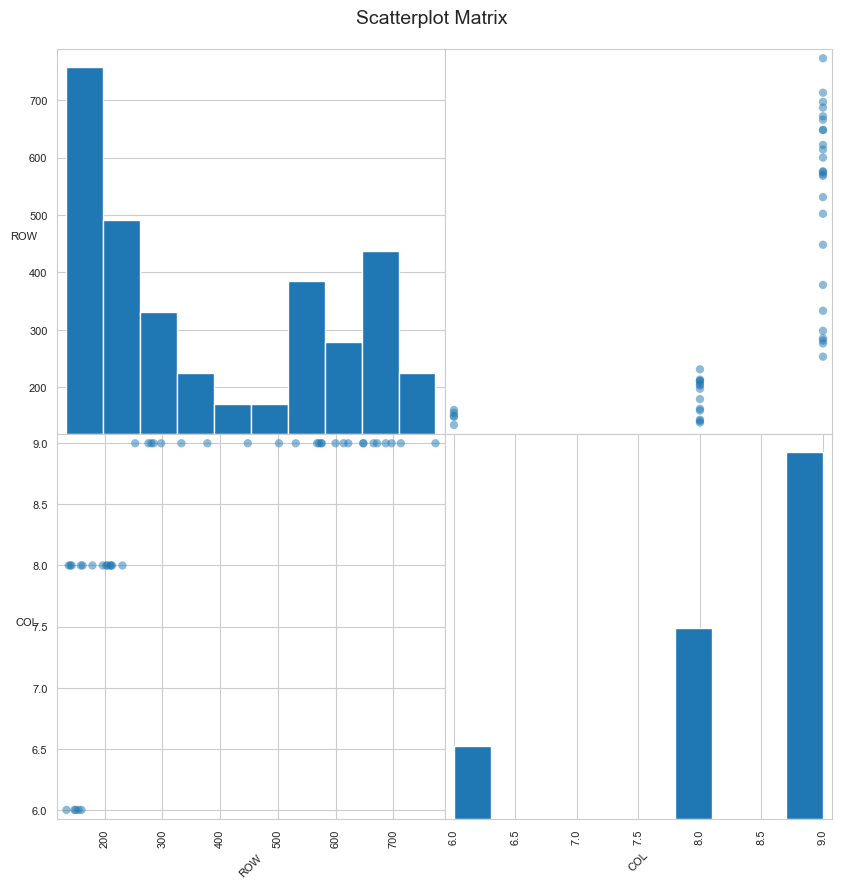

In [50]:
data = pd.DataFrame(process_tables_shape, columns=["ROW", "COL"])
scatter_matrix = pd.plotting.scatter_matrix(
    data, alpha=0.5, figsize=(10, 10), diagonal='hist', marker='o')

# Add labels to the subplots
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=0)

plt.suptitle('Scatterplot Matrix', y=0.92, fontsize=14)

plt.show()

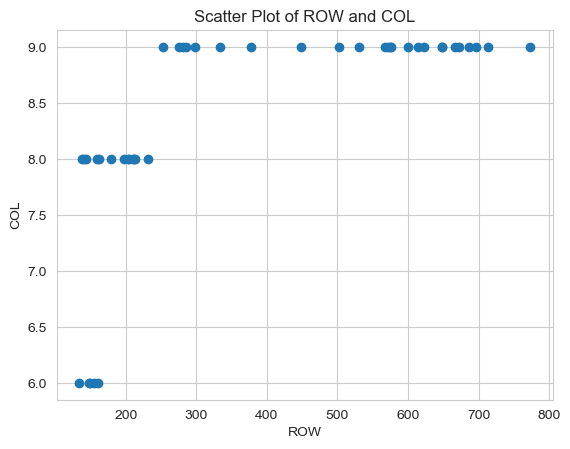

In [51]:
x = [point[0] for point in process_tables_shape]
y = [point[1] for point in process_tables_shape]

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('ROW')
plt.ylabel('COL')
plt.title('Scatter Plot of ROW and COL')

# Show the plot
plt.show()

In [52]:
dataframes['December_31_2013'].to_csv('test.csv')

In [53]:
dataframes['December_31_2013']

,INVESTMENTS IN NON-CONTROLLED/NON-AFFILIATED INVESTMENTS 0137.3,Industry,Par Amount*,Cost,Fair Value (1),Unnamed: 5
0,CORPORATE DEBT0127.9,,,,,
1,SECURED DEBT074.3,,,,,
2,1st Lien Secured Debt035.6,,,,,
3,"Archroma, L+825, 10/1/18 ‡",Chemicals,35511,34819,35422,
4,"Avanti Communications Group PLC, 10.00, 10/1/1...",Telecommunications,11000,11000,11468,
...,...,...,...,...,...,...
156,"Osage Exploration & Development, Inc., Common **‡",Oil & Gas,1496843,0,1171,
157,"Spotted Hawk Development LLC, Common **‡",Oil & Gas,54545,852,3139,
158,Total Warrants,5019,13367,,,
159,TOTAL EQUITY,55879,48454,,,
